# Exploratory Data Analysis: AI4I 2020 Data

By- Abhijeet Srivastav

- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**Data Set Information**

A synthetic Dataset that reflects real predictive maintenance encountered in industry.

Source: UIC Machine Learning Repository [Dataset Link](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset) 


- This dataset has 100000 rows and 14 columns.
- The machine failure consists of five independent failure modes namely TWF, HDF, PWF, OSF, RNF
- If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.

**Attribute Information**


1. UID: unique identifier( ranging from 1 to 10000)
2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
6. torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
7. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
8. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
9. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolS rotational speed is below 1380 rpm. This is the case for 115 data points.
10. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
11. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 data points.
12. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 data points in our dataset.

## 0. Required Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Problem Statement

To predict the failure of the machine.


Machine fails when any of the five independent failure mode(TWF, HDF, PWF, OSF, RNF) turns to be true which depend on the different parameters in the dataset.

## 2. Data Collection

In [3]:
df = pd.read_csv('../Dataset/ai4i2020.csv')

In [4]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 3. Data Preprocessing

In [5]:
df.shape

(10000, 14)

### 3.1. Removing null values

Visualizing the null values

<AxesSubplot:>

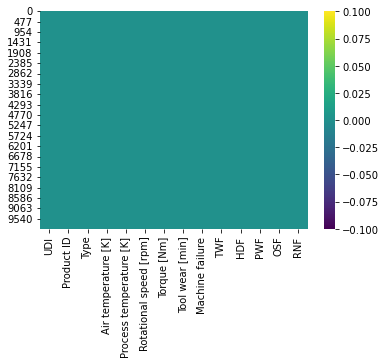

In [6]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

In [7]:
df.isnull().any()

UDI                        False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

Their are no null values in any of the columns.

### 3.2. Removing NA values

<AxesSubplot:>

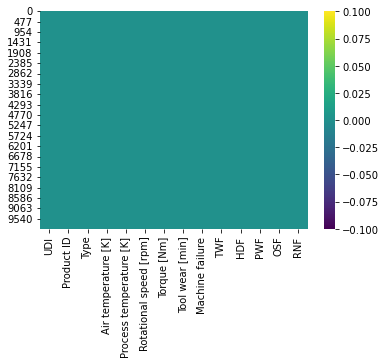

In [8]:
sns.heatmap(df.isna(), cbar=True, cmap='viridis')

In [9]:
df.isna().any()

UDI                        False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

Their are no NA values in any of the columns

### 3.4. Correcting the data type of the features

In [10]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

As  Machine Failure, TWF, HDF, PWF, OSF, RNF are categorical values we will change their data type to object.

In [11]:
to_mod = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

for feature in df.columns:
    if feature in to_mod:
        df[feature] = df[feature].astype('object')

In [12]:
df.dtypes[df.dtypes == 'object']

Product ID         object
Type               object
Machine failure    object
TWF                object
HDF                object
PWF                object
OSF                object
RNF                object
dtype: object

### 3.5. Drop irrelevant columns  

In [13]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

UDI is just an unique identifier and not useful to achieve our objective, so we are going to drop it.

In [14]:
df.drop('UDI',inplace=True, axis=1)

# 4. Feature Segregation

In [15]:
df.dtypes

Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure             object
TWF                         object
HDF                         object
PWF                         object
OSF                         object
RNF                         object
dtype: object

Lets segregate categorical and numerical features of our dataset

In [16]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [18]:
cat_features

['Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [19]:
num_features

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

Lets have separate data frame of numerical and categorical features for future reference.

In [20]:
cat_df = df.filter(cat_features)

In [21]:
num_df = df.filter(num_features)

## 5. Detection and Removal of Outliers

### 5.1. Detecting outliers using Box plot

Outliers are only present within the numerical features.

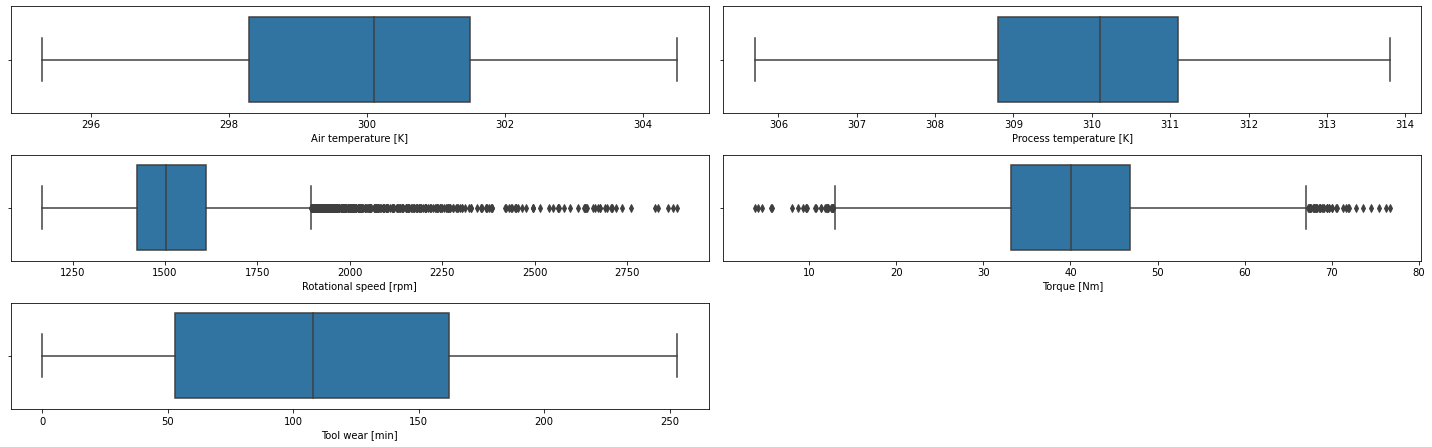

In [22]:
n = 1 
plt.figure(figsize=(20, 10))
for feature in num_features:
    plt.subplot(5, 2, n)
    n += 1
    sns.boxplot(df[feature])
    plt.tight_layout()

### 5.2. Detecting outliers by z-score

In [23]:
z_scores = []
for feature in num_features:
    z_scores.append(np.abs(stats.zscore(df[feature])))

In [24]:
z_scores

[0       0.952389
 1       0.902393
 2       0.952389
 3       0.902393
 4       0.902393
           ...   
 9995    0.602417
 9996    0.552421
 9997    0.502425
 9998    0.502425
 9999    0.502425
 Name: Air temperature [K], Length: 10000, dtype: float64,
 0       0.947360
 1       0.879959
 2       1.014761
 3       0.947360
 4       0.879959
           ...   
 9995    1.082162
 9996    1.082162
 9997    0.947360
 9998    0.879959
 9999    0.879959
 Name: Process temperature [K], Length: 10000, dtype: float64,
 0       0.068185
 1       0.729472
 2       0.227450
 3       0.590021
 4       0.729472
           ...   
 9995    0.363820
 9996    0.520005
 9997    0.592519
 9998    0.729472
 9999    0.216294
 Name: Rotational speed [rpm], Length: 10000, dtype: float64,
 0       0.282200
 1       0.633308
 2       0.944290
 3       0.048845
 4       0.001313
           ...   
 9995    1.052012
 9996    0.821283
 9997    0.660777
 9998    0.854005
 9999    0.021376
 Name: Torque [Nm], Leng

Lets set our threshold to 3 and identify the outliers.

In [25]:
threshold = 3
for z in z_scores:
    print(np.where(z > threshold))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([  50,  194,  298,  305,  344,  380,  400,  418,  463,  467,  601,
        847,  887,  903,  989, 1095, 1115, 1209, 1234, 1264, 1284, 1304,
       1391, 1416, 1499, 1500, 1525, 1541, 1562, 1564, 1747, 1784, 1808,
       1920, 1936, 2080, 2233, 2421, 2452, 2587, 2589, 2612, 2665, 2708,
       2781, 2904, 2940, 3071, 3092, 3121, 3140, 3215, 3320, 3327, 3369,
       3437, 3457, 3468, 3579, 3589, 3867, 4030, 4048, 4053, 4090, 4201,
       4215, 4228, 4292, 4296, 4302, 4419, 4422, 4444, 4591, 4612, 4687,
       4726, 4738, 4762, 4826, 4899, 4903, 4956, 4988, 4997, 5001, 5115,
       5127, 5152, 5186, 5230, 5298, 5327, 5334, 5449, 5647, 5667, 5687,
       5848, 5948, 6006, 6059, 6147, 6229, 6243, 6310, 6405, 6502, 6511,
       6594, 6654, 6662, 6718, 6790, 6799, 6861, 6879, 6977, 6987, 6990,
       7011, 7024, 7086, 7120, 7182, 7260, 7409, 7513, 7536, 7567, 7672,
       7687, 7810, 7818, 7886, 7957, 7997, 8009, 8110, 8114, 8184, 8241

**Observation:** We can observe the row numbers where the value of z-score is greater than the threshold for respective numerical features.

We can clearly observe in graph as well that we have outliers in the Rotational speed and Torque features.

### 5.3. Removal of outliers

Now we will calculate the IQR for these two numerical features only which have outliers in them and then will calculate the lower and higher fence for these features respectively.

```
    IQR = Q3 - Q1    
    LF = Q1 - 1.5 * IQR 
    HF = Q3 + 1.5 * IQR
```

In [26]:
features_with_outliers = ['Rotational speed [rpm]','Torque [Nm]']

In [27]:
outlier_features_IQR = {}
lower_fences = {}
higher_fences = {}

for feature in features_with_outliers:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    LF = Q1 - 1.5 * IQR 
    HF = Q3 + 1.5 * IQR

    outlier_features_IQR[feature] = IQR
    lower_fences[feature] = LF
    higher_fences[feature] = HF

In [28]:
outlier_features_IQR, lower_fences, higher_fences

({'Rotational speed [rpm]': 189.0, 'Torque [Nm]': 13.599999999999994},
 {'Rotational speed [rpm]': 1139.5, 'Torque [Nm]': 12.800000000000011},
 {'Rotational speed [rpm]': 1895.5, 'Torque [Nm]': 67.19999999999999})

## 6. Bivariate Analysis

### 6.1. Correlation of numerical features

In [29]:
num_df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


<AxesSubplot:>

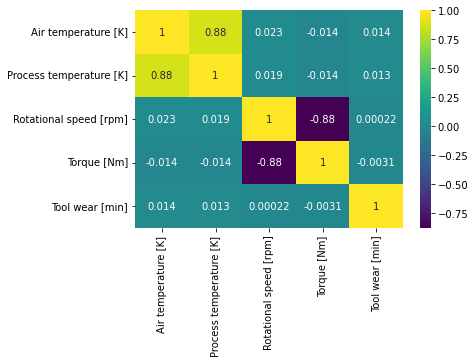

In [30]:
sns.heatmap(num_df.corr(), cbar=True, cmap='viridis', annot=True)

**Observation:** We can observe that:
- Rotational speed and Torque are highly negative correlated.
- Air Temperature and Process Temperature are highly positive correlated.
- Air temperature and Rotational speed are positively correlated.

Multi collinearity is present here and need to be handled.

### 6.2. Relationship between categorical features

In [31]:
cat_features

['Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

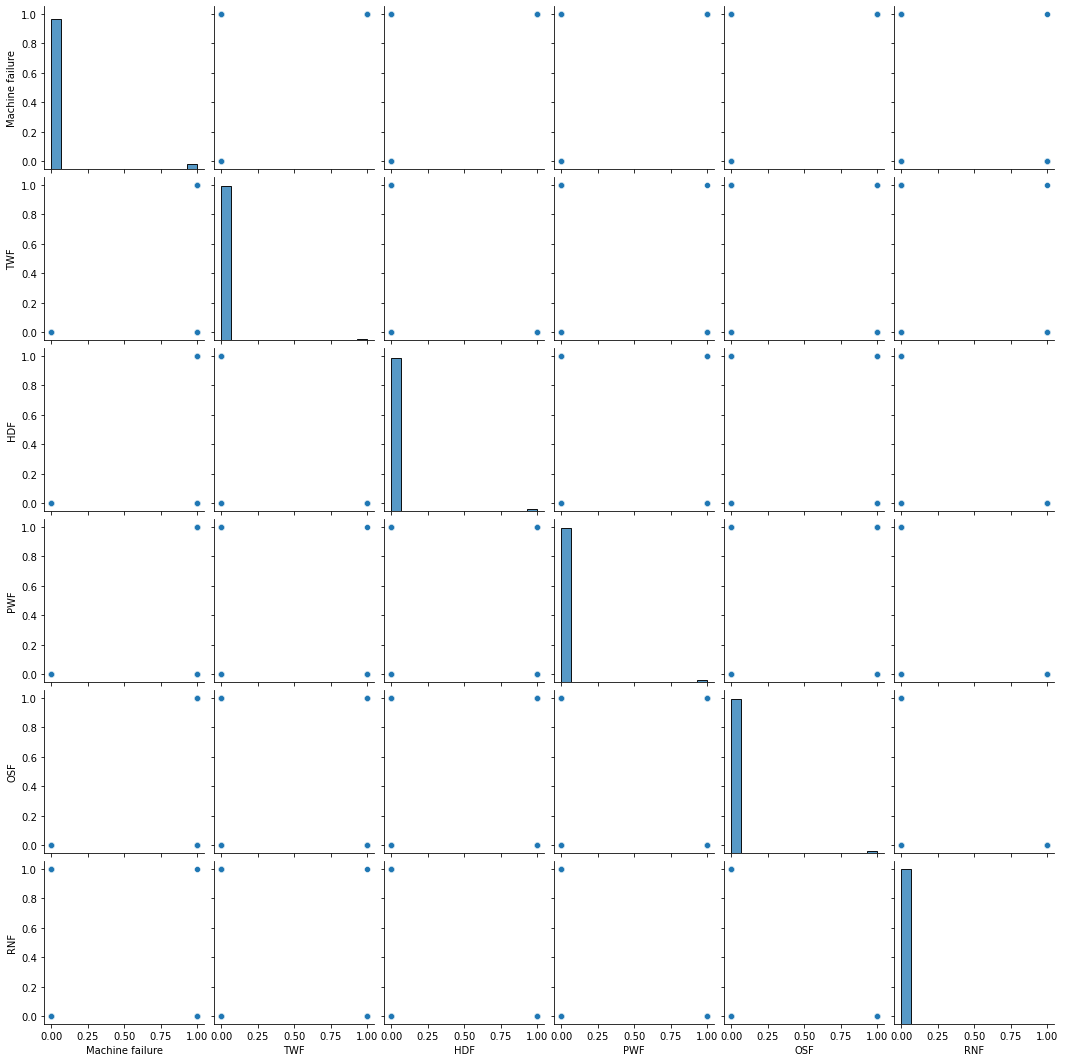

In [32]:
sns.pairplot(cat_df)

**Observation:** We can observe that their are no relation between any categorical feature.

## 7. Univariate Analysis

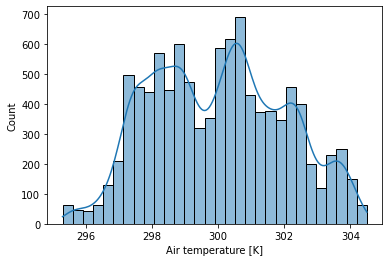

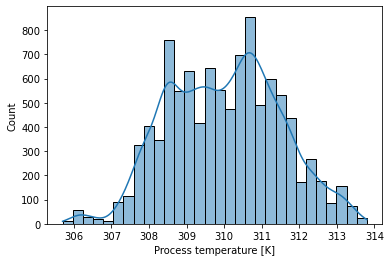

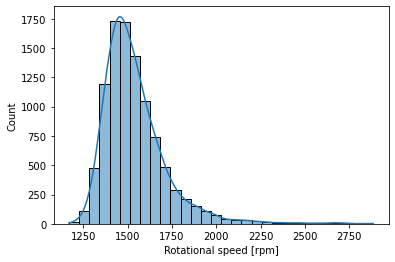

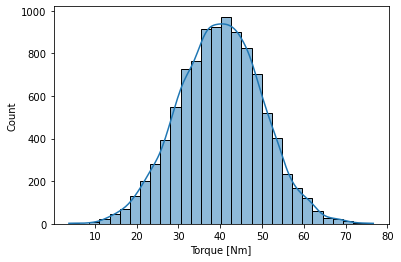

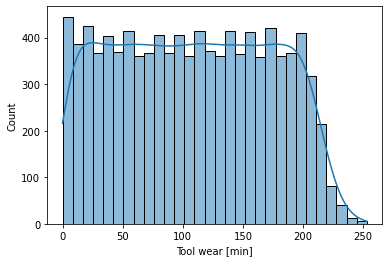

In [33]:
for feature in num_features:
    sns.histplot(data=num_df, x=feature, kde=True, bins=30)
    plt.show()

**Observations:**
- Torque is almost normally distributed.
- Air temperature and process temperature are some what normally distributed.
- Rotational speed is completely right skewed.
- Tool wear is almost uniformly distributed.

## 8. Analytical Observations

### 8.1. What range of Tool Wear values caused Machine Failure ?

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Machine failure'>

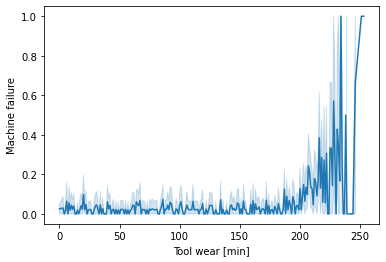

In [34]:
sns.lineplot(data=df, x=df['Tool wear [min]'], y=df['Machine failure'])

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Machine failure'>

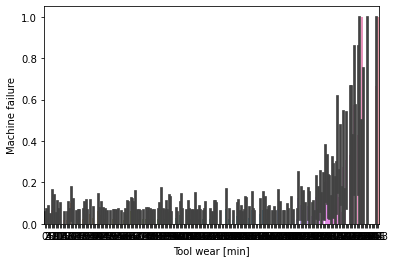

In [35]:
sns.barplot(data=df, x=df['Tool wear [min]'], y=df['Machine failure'])

Lets check what are all those torque values when machine failed.

In [36]:
tores = []

for index, data in df[['Machine failure']].iterrows():
    if data[0] == 1:
        val = df['Tool wear [min]'][index]
        tores.append(val)

In [37]:
max(tores)

253

**Observations:**

- When Tore value is in the range of 200 to 250 then Machine failure is maximum.
- Maximum value of Tore when machine failed is 253.

### 8.2. How is Tool Wear related to Air temperature?

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Air temperature [K]'>

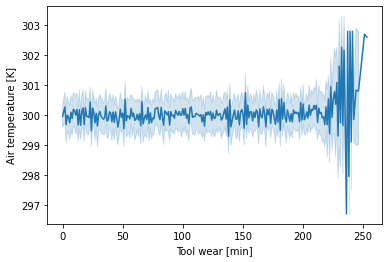

In [38]:
sns.lineplot(data=df, x=df['Tool wear [min]'], y=df['Air temperature [K]'])

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Air temperature [K]'>

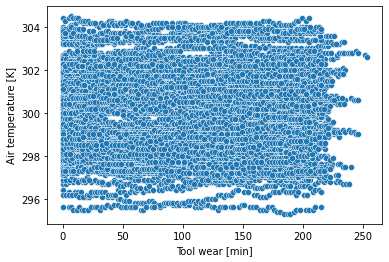

In [39]:
sns.scatterplot(data=df, x=df['Tool wear [min]'], y=df['Air temperature [K]'])

**Observations:** 

We can observe no as such particular relation between Air Temperature and Tool Wear as such.

### 8.3.  How is Tool Wear related to Rotational Speed?

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

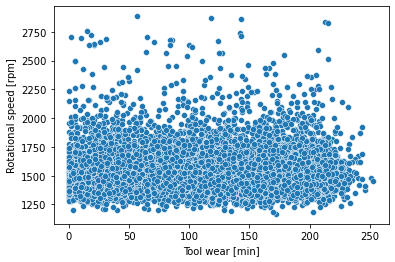

In [40]:
sns.scatterplot(data=df, x=df['Tool wear [min]'], y=df['Rotational speed [rpm]'])

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

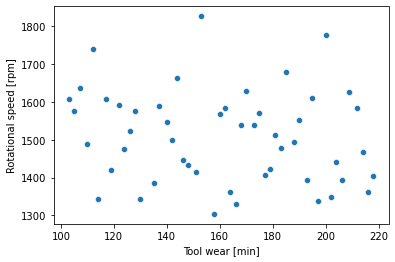

In [41]:
sns.scatterplot(data=df, x=df['Tool wear [min]'][200:250], y=df['Rotational speed [rpm]'])

**Observations:** 
- Rotational speed is densely packed within range of 1250 to 2000.
- If we zoom in to the Tool wear within range of 200 to 250 as in this we have maximum machine failures, their we cant find strong relation as such between Rotational speed and Tool wear.

### 8.4. Which Machine type has maximum failures?

<AxesSubplot:xlabel='Type', ylabel='Machine failure'>

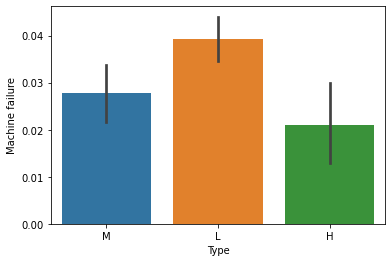

In [42]:
sns.barplot(data=df, x=df['Type'], y=df['Machine failure'])

<AxesSubplot:xlabel='count', ylabel='Type'>

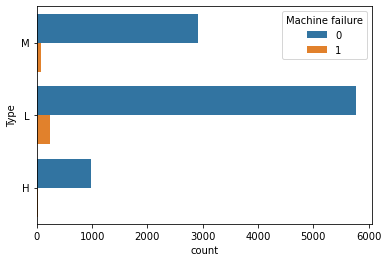

In [43]:
sns.countplot(data=df, y=df['Type'], hue=df['Machine failure'])

In [44]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

**Observations:**
- Type L machines has maximum failures
- Type M machines has second highest machine failures.
- Type H machines has least failures.
- We can notice most machines are of type L and also has maximum failures.

### 8.5. Which failure mode occurs more frequent?

In [ ]:
df.plot(x="Name", y=["Price", "User Rating"], kind="bar", figsize=(9, 8))


In [ ]:
[df['TWF'], df['HDF'], df['PWF'], df['OSF'], df['RNF']]

ValueError: x and y must be the same size

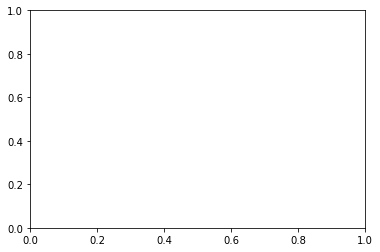

In [61]:
df.plot(x='Machine failure', y=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], kind='scatter')

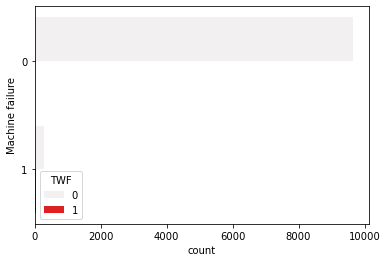

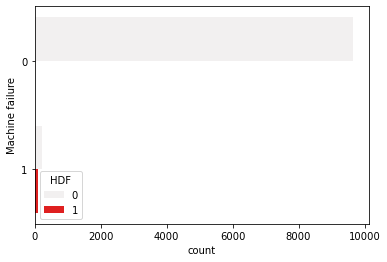

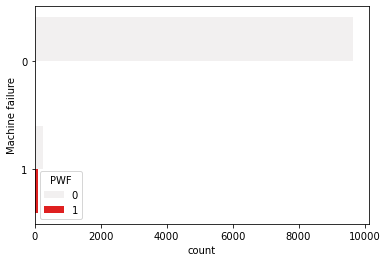

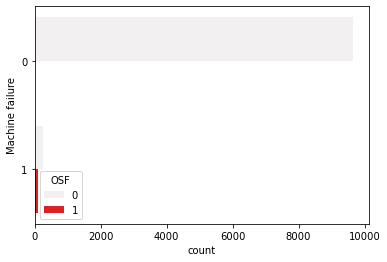

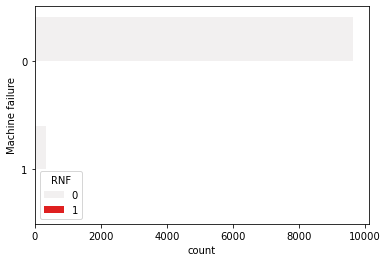

In [72]:
for failure_mode in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    sns.countplot(data=df, hue=df[failure_mode], y=df['Machine failure'], color='Red')
    plt.show()

In [46]:
num_features, cat_features

(['Air temperature [K]',
  'Process temperature [K]',
  'Rotational speed [rpm]',
  'Torque [Nm]',
  'Tool wear [min]'],
 ['Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])